# Business Objectives:
Our main business objectives are to understand the dynamics of the labour market of Armenia using
the online job portal post as a proxy. A secondary objective is to implement advanced text analytics
as a proof of concept to create additional features such as enhanced search function that can add
additional value to the users of the job portal.

Business questions answering to our business objectives are defined as follows:

**Job Nature and Company Profiles:** What are the types of jobs that are in demand in Armenia? How are the job natures changing over time?

**Desired Characteristics and Skill-Sets:** What are the desired characteristics and skill -set of the candidates based on the job description dataset? How these are desired characteristics changing over time?

**IT Job Classification:** Build a classifier that can tell us from the job description and company
description whether a job is IT or not, so that this column can be automatically populated for new
job postings. After doing so, understand what important factors are which drives this classification.

**Similarity of Jobs:** Given a job title, find the 5 top jobs that are of a similar nature, based on the job
post.

In [2]:
%%html
<style>
body {
    font-family: "Verdana", cursive, sans-serif;
}
</style> 

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Importing and Data Preparation

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

# For encoding
from numpy import where as IF

# For text cleaning
import re

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# spacy
import spacy

#Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Text Visualization
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import random
import os

In [5]:
job  = pd.read_csv('data job posts.csv')
job.head()

jobpost          date  \
0  AMERIA Investment Consulting Company\nJOB TITL...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\nJOB...   Jan 7, 2004   
3  Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...   Jan 7, 2004   
4  Yerevan Brandy Company\nJOB TITLE:  Software D...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Caucasus Environmental NGO Network (CENN)              NaN  NaN   
3                                     Manoff Group              NaN  NaN   
4                           Yerevan Brandy Company              NaN  NaN   

  Eligibility Audience StartDate                             Duration  ...  \
0         NaN      NaN       NaN                                  NaN  ...   
1         NaN      NaN       NaN                             3 months  ...   
2         NaN      NaN       NaN  Renewable annual contract\nPOSITION  ...   
3         NaN      NaN       NaN                                  NaN  ...   
4         NaN      NaN       NaN                                  NaN  ...   

  Salary                                       ApplicationP OpeningDate  \
0    NaN  To apply for this position, please submit a\nc...         NaN   
1    NaN  Please submit a cover letter and resume to:\nI...         NaN   
2    NaN  Please send resume or CV toursula.kazarian@......         NaN   
3    NaN  Please send cover letter and resume to Amy\nPe...         NaN   
4    NaN  Successful candidates should submit\n- CV; \n-...         NaN   

                                      Deadline Notes  \
0                              26 January 2004   NaN   
1                              12 January 2004   NaN   
2  20 January 2004\nSTART DATE:  February 2004   NaN   
3      23 January 2004\nSTART DATE:  Immediate   NaN   
4                       20 January 2004, 18:00   NaN   

                                              AboutC Attach  Year Month     IT  
0                                                NaN    NaN  2004     1  False  
1  The International Research & Exchanges Board (...    NaN  2004     1  False  
2  The Caucasus Environmental NGO Network is a\nn...    NaN  2004     1  False  
3                                                NaN    NaN  2004     1  False  
4                                                NaN    NaN  2004     1   True  

[5 rows x 24 columns]

In [6]:
job.shape

(19001, 24)

In [9]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [5]:
job_new = job[['jobpost','date','Title','Company','Location','Salary','Year','Month','IT']]

In [6]:
job_new.nunique()

jobpost     18892
date         4391
Title        8636
Company      4554
Location      759
Salary       2692
Year           12
Month          12
IT              2
dtype: int64

In [7]:
job_new.isnull().sum()

jobpost        0
date           0
Title         28
Company        7
Location      32
Salary      9379
Year           0
Month          0
IT             0
dtype: int64

In [8]:
job_new.fillna('Unknown',inplace=True)

C:\anaconda3old\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
job_new['Location'] = job_new.Location.fillna('Unknown')

C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
job_new.head()

jobpost          date  \
0  AMERIA Investment Consulting Company\nJOB TITL...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\nJOB...   Jan 7, 2004   
3  Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...   Jan 7, 2004   
4  Yerevan Brandy Company\nJOB TITLE:  Software D...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company  \
0             AMERIA Investment Consulting Company   
1  International Research & Exchanges Board (IREX)   
2        Caucasus Environmental NGO Network (CENN)   
3                                     Manoff Group   
4                           Yerevan Brandy Company   

                                            Location   Salary  Year  Month  \
0                                   Yerevan, Armenia  Unknown  2004      1   
1  IREX Armenia Main Office; Yerevan, Armenia \nD...  Unknown  2004      1   
2                                   Yerevan, Armenia  Unknown  2004      1   
3                                Manila, Philippines  Unknown  2004      1   
4                                   Yerevan, Armenia  Unknown  2004      1   

      IT  
0  False  
1  False  
2  False  
3  False  
4   True

In [80]:
job_new.Location[10].split('\n')[0]

'Unknown'

In [11]:
location = []
for i in job_new.Location:
    if str('Armenia') in i:
        location.append('Armenia')
    else:
        location.append('Unknown')

In [102]:
job_new.Location[0:10]

0                                     Yerevan, Armenia
1    IREX Armenia Main Office; Yerevan, Armenia \nD...
2                                     Yerevan, Armenia
3                                  Manila, Philippines
4                                     Yerevan, Armenia
5    Yerevan, Armenia\nWORK HOURS: 10:00 - 20:00; o...
6                                     Yerevan, Armenia
7    IREX Armenia Main Office\nDESCRIPTION:   IREX ...
8                                     Yerevan, Armenia
9                                              Unknown
Name: Location, dtype: object

In [12]:
job_new['Location_armenia'] = location

C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
job_new.head()

jobpost          date  \
0  AMERIA Investment Consulting Company\nJOB TITL...   Jan 5, 2004   
1  International Research & Exchanges Board (IREX...   Jan 7, 2004   
2  Caucasus Environmental NGO Network (CENN)\nJOB...   Jan 7, 2004   
3  Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...   Jan 7, 2004   
4  Yerevan Brandy Company\nJOB TITLE:  Software D...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company  \
0             AMERIA Investment Consulting Company   
1  International Research & Exchanges Board (IREX)   
2        Caucasus Environmental NGO Network (CENN)   
3                                     Manoff Group   
4                           Yerevan Brandy Company   

                                            Location   Salary  Year  Month  \
0                                   Yerevan, Armenia  Unknown  2004      1   
1  IREX Armenia Main Office; Yerevan, Armenia \nD...  Unknown  2004      1   
2                                   Yerevan, Armenia  Unknown  2004      1   
3                                Manila, Philippines  Unknown  2004      1   
4                                   Yerevan, Armenia  Unknown  2004      1   

      IT Location_armenia  
0  False          Armenia  
1  False          Armenia  
2  False          Armenia  
3  False          Unknown  
4   True          Armenia

In [151]:
job_new.groupby(['Location_armenia'])[['Title']].count()

Title
Location_armenia       
Armenia           18616
Unknown             385

# Job Nature and Company Profiles

In [153]:
job1 = job_new[job_new.Location_armenia == 'Armenia']

Text(0.5, 1.0, 'Job Title vs No. of Jobs')

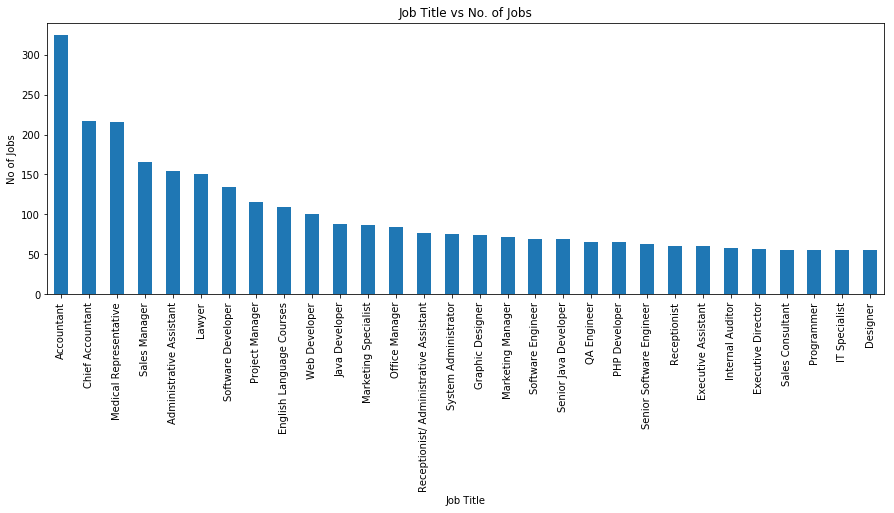

In [166]:
plt.figure(figsize=(15,5))
job1.Title.value_counts().head(30).plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('No of Jobs')
plt.title('Job Title vs No. of Jobs')

- The **top demand jobs in Armenia** are Accountant, Chief Accountant, Medical Representative, Sales Manager, Administrative Assistant, Lawyer, Software Developer etc.

Text(0.5, 1.0, 'Job Title(only IT) vs No. of Jobs')

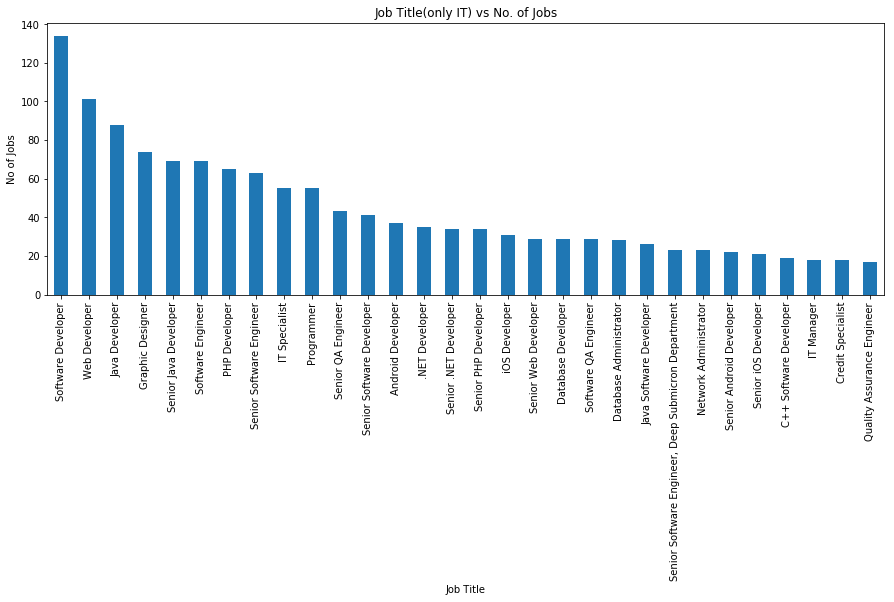

In [174]:
plt.figure(figsize=(15,5))
job1[job1.IT == True].Title.value_counts().head(30).plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('No of Jobs')
plt.title('Job Title(only IT) vs No. of Jobs')

- The **top demand IT jobs in Armenia** are Software Developer, web Developer, Java Developer, Graphic Designer, Senior Java Development, Sofrware Engineer, PHP Developer, Senior Software Engineer etc.

Text(0.5, 1.0, 'Year vs No. of Jobs in Armenia')

<Figure size 360x360 with 0 Axes>

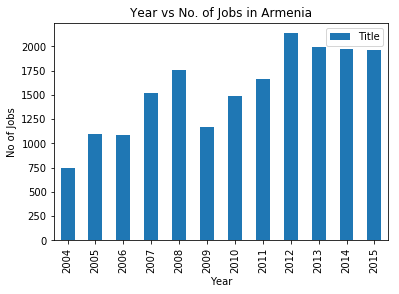

In [195]:
plt.figure(figsize=(5,5))
job1.groupby(['Year'])[['Title']].count().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No of Jobs')
plt.title('Year vs No. of Jobs in Armenia')

- The **Most No. of jobs in Armenia** are at the year 2015,2014,2013,2012 etc.

## Yearwise Job Demands in Armenia

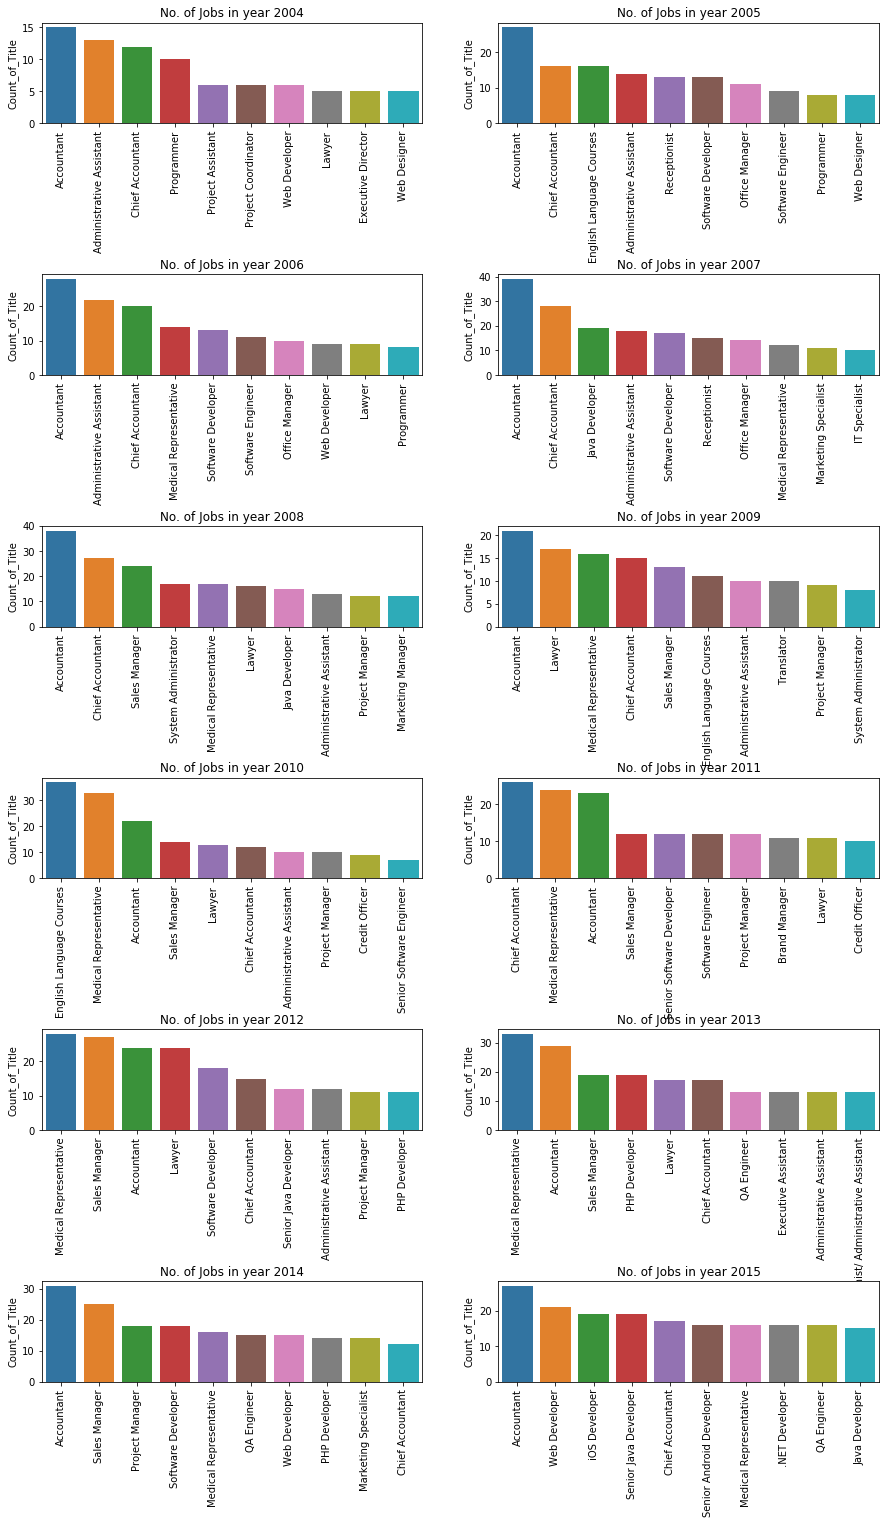

In [244]:
features=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
# cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']
            
fig=plt.subplots(figsize=(15,25))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 1.5)
    df = job1[job1.Year== j]
    df = df.groupby(['Title'])[['Title']].count().add_prefix('Count_of_').sort_values('Count_of_Title',ascending=False)
    df = df.head(10).reset_index()
    sns.barplot(x='Title',y='Count_of_Title',data=df)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title("No. of Jobs in year "+f"{j}")

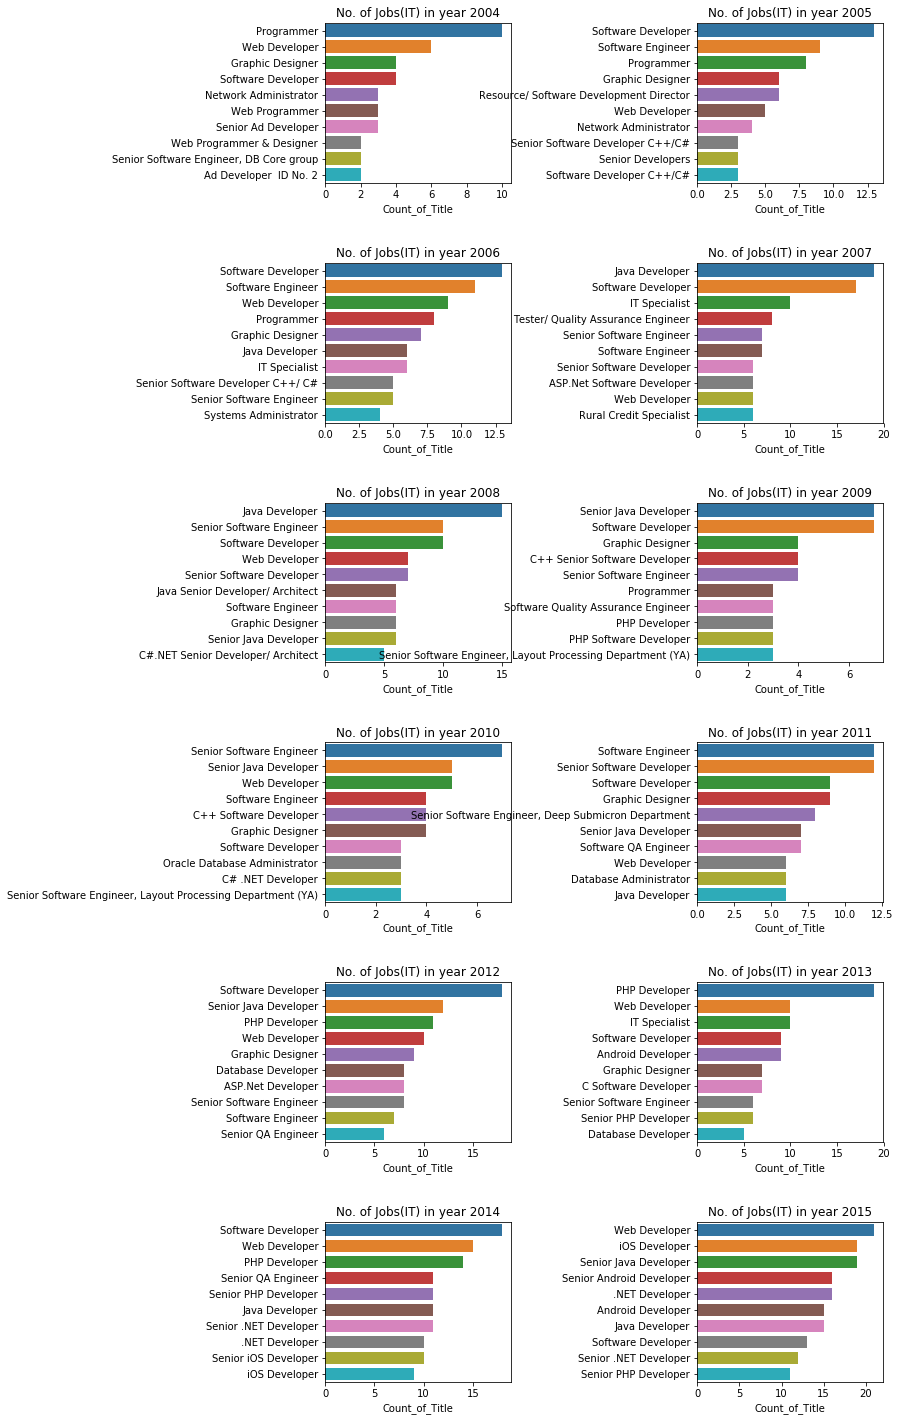

In [256]:
# Job Demands in IT
features=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
# cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']
job2 = job1[job1.IT == True]            
fig=plt.subplots(figsize=(10,25))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(wspace = 1,hspace=0.5)
    df = job2[job2.Year== j]
    df = df.groupby(['Title'])[['Title']].count().add_prefix('Count_of_').sort_values('Count_of_Title',ascending=False)
    df = df.head(10).reset_index()
    sns.barplot(y='Title',x='Count_of_Title',data=df)
#     plt.xticks(rotation=90)
    plt.ylabel('')
    plt.title("No. of Jobs(IT) in year "+f"{j}")

# Desired Characteristices and Skill sets

In [14]:
# Function to search string in sentence
def search_for(string,sentence):
    try:
        ans = string in sentence
    except :
        ans = False
    return ans

In [15]:
job['RequiredQual'].apply(lambda x : search_for('Linux',x)).sum()

1143

In [16]:
job['RequiredQual'].apply(lambda x : search_for('Python',x)).sum()

209

In [17]:
job['is_Python'] = job['RequiredQual'].apply(lambda x : search_for('Python',x))

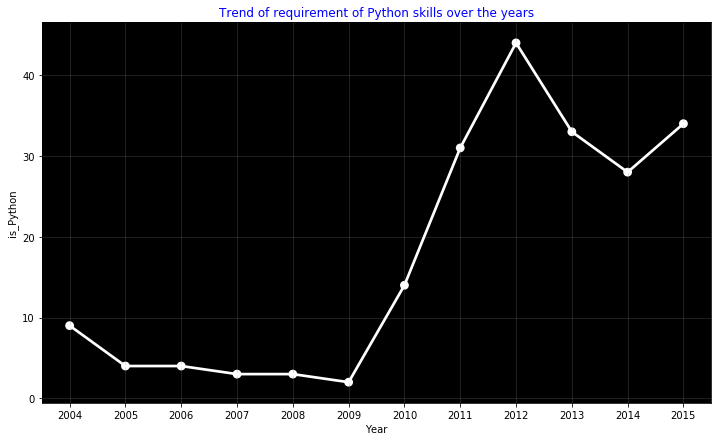

In [23]:
# Trend of requirement of Python skill over the years
att1 = job.groupby('Year')[['is_Python']].sum().reset_index()

plt.figure(figsize=(12,7))
ax = sns.pointplot(att1["Year"],att1["is_Python"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Trend of requirement of Python skills over the years",color='b')
plt.show()

## Looking for most often required skills in JobRequired Qualification

In [26]:
# Finding the skills that are mensioned in most of the job descriptions.
job['RequiredQual'].fillna('Unknown',inplace=True)

# Cleaning the text
qual = job['RequiredQual']
qual_clean = [re.compile("[.;:!\'?,\"()\[\]\r\n/-]").sub("",line.lower()) for line in list(qual)]

In [27]:
# spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


# nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens



text_data = []
for qual in qual_clean:
    tokens = prepare_text(qual)
    text_data.append(tokens)

# Removing repited words in each word list
word_list = []
for l1 in text_data:
    word_list.append(list(set(l1)))

job3 = job # Creating copy of original dataframe

# Creating new qualification word list count
job3['qual_word_list']= pd.Series(word_list)

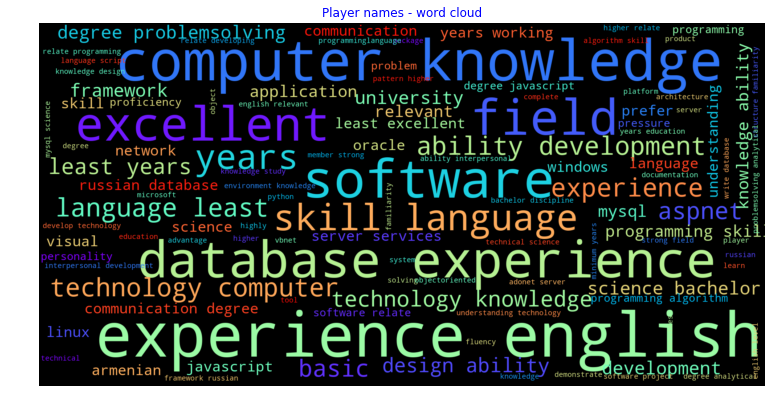

In [28]:
# Checking for most common words mentioned in job qualification Description for all "Software Developer" job profile.
qual_word = list(job3[job3.Title == 'Software Developer']['qual_word_list'])

bag_of_words = []
for review in qual_word:
    for word in review:
        bag_of_words.append(word)

text = ' '.join(bag_of_words)

# Display the generated image:
wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(text)
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Player names - word cloud",color='b')
plt.show()
#-----------------ROUGH CODE------------------------
# dict1 = Counter(bag_of_words)
# from collections import Counter
# l1= sorted(list(dict1.values()), reverse=True)[0:10]
# tuple_list = []
# for word, count in dict1.items():   
#     if count in l1:
#         tuple_list.append(tuple((word,count)))
        # dict2 = dict(tuple_list)
# # pd.DataFrame(dict2)

## WordCloud Visualization

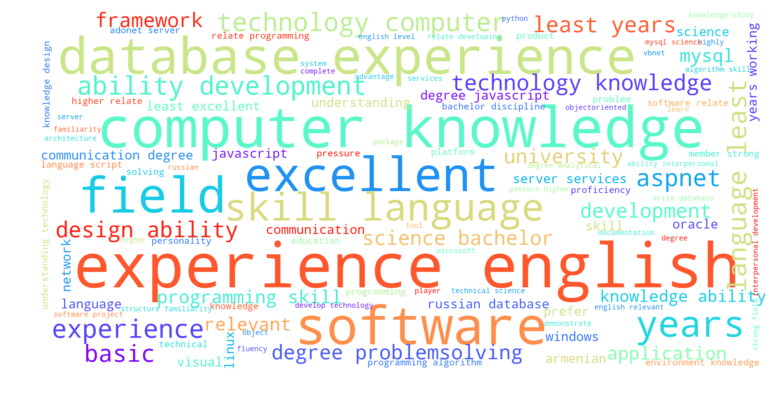

In [29]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(scale=5, max_words=1000, background_color="white",colormap="rainbow").generate(text)
plt.figure(figsize=(13,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Masking word-cloud on the different images

In [36]:
wine_mask = np.array(Image.open("computer-monitor.jpg"))
wine_mask

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.


In [37]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.


In [38]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine.


In [39]:
# Check the expected result of your mask
transformed_wine_mask

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26]])

Okay! With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choice of color, you can take a look at this color code table


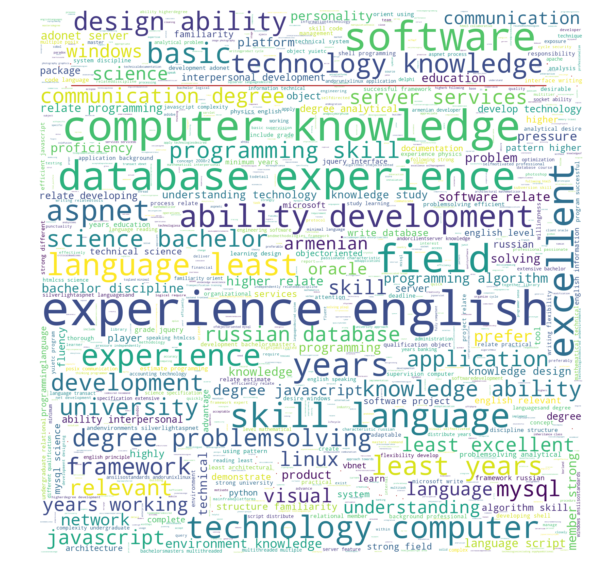

In [42]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(text)




# store to file
wc.to_file("computer.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

(866, 624)
(866, 624)


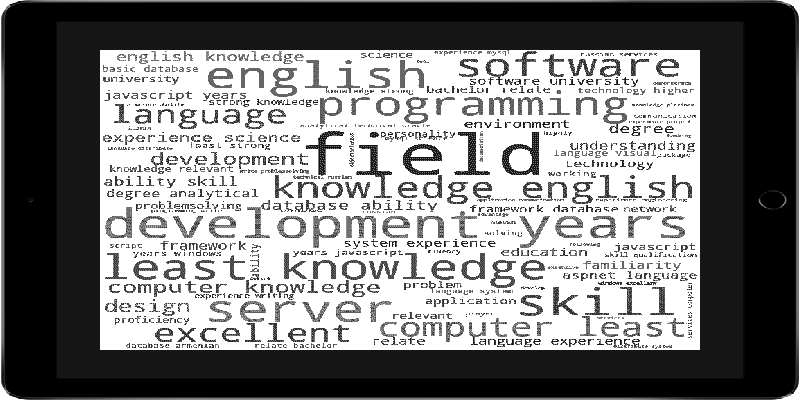

In [444]:
# Merging two images on top of one another
img1 = Image.open("bg-device_ipad.png")
img2 = Image.open("computer.png")

#Checking image size
print(img1.size)
print(img2.size)

#Resizing the images
img3 = img2.resize((600,300))
img_ipod = img1.resize((800,400))

# Assigning area to put image onto another
area = (100,50,700,350)

#Pasting one image on another
img_ipod.paste(img3, area)

img_ipod

# IT Job Classifier

## Data Preparation

In [16]:
job_clf = job[['JobDescription','AboutC','IT']]

In [17]:
job_clf.head()

JobDescription  \
0  AMERIA Investment Consulting Company is seekin...   
1                                                NaN   
2  Public outreach and strengthening of a growing...   
3  The LEAD (Local Enhancement and Development fo...   
4                                                NaN   

                                              AboutC     IT  
0                                                NaN  False  
1  The International Research & Exchanges Board (...  False  
2  The Caucasus Environmental NGO Network is a\nn...  False  
3                                                NaN  False  
4                                                NaN   True

In [18]:
job_clf.shape

(19001, 3)

In [19]:
job_clf.isnull().sum()

JobDescription    3892
AboutC            6531
IT                   0
dtype: int64

In [20]:
job_clf.fillna('Unknown', inplace=True)

C:\anaconda3old\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [21]:
job_clf.isnull().sum()

JobDescription    0
AboutC            0
IT                0
dtype: int64

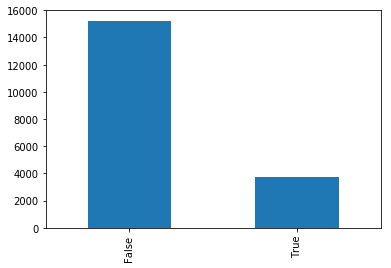

In [25]:
job_clf.IT.value_counts().plot(kind = 'bar')

In [26]:
# Cleaning the text
text = job_clf['JobDescription']
text_clean = [re.compile("[.;:!\'?,\"()\[\]\r\n/-]").sub("",line.lower()) for line in list(text)]

job_clf['job_des_clean'] = pd.Series(text_clean)

In [34]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(job_clf['job_des_clean'], job_clf['IT'])


# # label encode the target variable 
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [38]:
train_y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Feature Engineering
The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.

2.1 **Count Vectors as features**

2.2 **TF-IDF Vectors as features**

   - Word level
   - N-Gram level
   - Character level
   
2.3 **Word Embeddings as features**

2.4 **Text / NLP based features**

2.5 **Topic Models as features**

Lets look at the implementation of these ideas in detail.


### Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [40]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(job_clf['job_des_clean'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### TF-IDF Vectors as features

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

a.**Word Level TF-IDF :** Matrix representing tf-idf scores of every term in different documents

b.**N-gram Level TF-IDF :** N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams

c.**Character Level TF-IDF :** Matrix representing tf-idf scores of character level n-grams in the corpus

In [41]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(job_clf['job_des_clean'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(job_clf['job_des_clean'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(job_clf['job_des_clean'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

### Text / NLP based features

A number of extra text based features can also be created which sometimes are helpful for improving text classification models. Some examples are:

- Word Count of the documents – total number of words in the documents
- Character Count of the documents – total number of characters in the documents
- Average Word Density of the documents – average length of the words used in the documents
- Puncutation Count in the Complete Essay – total number of punctuation marks in the documents
- Upper Case Count in the Complete Essay – total number of upper count words in the documents
- Title Word Count in the Complete Essay – total number of proper case (title) words in the documents

- Frequency distribution of Part of Speech Tags:
   - Noun Count
   - Verb Count
   - Adjective Count
   - Adverb Count
   - Pronoun Count
   
These features are highly experimental ones and should be used according to the problem statement only.

In [43]:
job_clf['char_count'] = job_clf['job_des_clean'].apply(len)
job_clf['word_count'] = job_clf['job_des_clean'].apply(lambda x: len(x.split()))
job_clf['word_density'] = job_clf['char_count'] / (job_clf['word_count']+1)
# job_clf['punctuation_count'] = job_clf['job_des_clean'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
job_clf['title_word_count'] = job_clf['job_des_clean'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
job_clf['upper_case_word_count'] = job_clf['job_des_clean'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [45]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

job_clf['noun_count'] = job_clf['job_des_clean'].apply(lambda x: check_pos_tag(x, 'noun'))
job_clf['verb_count'] = job_clf['job_des_clean'].apply(lambda x: check_pos_tag(x, 'verb'))
job_clf['adj_count'] = job_clf['job_des_clean'].apply(lambda x: check_pos_tag(x, 'adj'))
job_clf['adv_count'] = job_clf['job_des_clean'].apply(lambda x: check_pos_tag(x, 'adv'))
job_clf['pron_count'] = job_clf['job_des_clean'].apply(lambda x: check_pos_tag(x, 'pron'))


C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\anac

### Topic Models as features

Topic Modelling is a technique to identify the groups of words (called a topic) from a collection of documents that contains best information in the collection. I have used Latent Dirichlet Allocation for generating Topic Modelling Features. LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a distribution over words, and each document is then represented as a distribution over topics. Although the tokens themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the different ideas contained in the documents. 

Lets see its implementation:

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
# train a LDA Model
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [50]:
topic_summaries

['legal law mainly lawyer ready assembly logic interns ii iii',
 'instruments inputs write b reference interactive edit unfpa embassy led',
 'in with and knowledge experience participate involved development will client',
 'the and of to will in for with be on',
 'excellent skills have an ability combine who pension intern international',
 'selected qualityassurance fao essence test stress assessments load enable asia',
 'equipment trade lending border goods customs territory import parts ibm',
 'the of will and under supervision in incumbent office administrative',
 'workshop agenda multisectoral cleantech offences chapter items tdf 7 inspections',
 'for responsible sales be incumbent designer and commercial store will',
 'unknown identified smooth river supply awp forecasting si hq consumers',
 'and the software will development design of for team engineer',
 'skilled consumer problem embedded carrying fire writer friendly german smarttech',
 'cases budget controller statements disas

## Model Building

The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:

   - Naive Bayes Classifier
   - Linear Classifier
   - Support Vector Machine
   - Bagging Models
   - Boosting Models
   - Shallow Neural Networks
   - Deep Neural Networks
   - Convolutional Neural Network (CNN)
   - Long Short Term Modelr (LSTM)
   - Gated Recurrent Unit (GRU)
   - Bidirectional RNN
   - Recurrent Convolutional Neural Network (RCNN)
   - Other Variants of Deep Neural Networks

Lets implement these models and understand their details. The following function is a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

For Neural Network Algorithm implementation Check out the following url:
https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [51]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### Naive Bayes

Implementing a naive bayes model using sklearn implementation with different features

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature here .


In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Naive Bayes on Count Vectors
accuracy = train_model(MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.9120185224163334
NB, WordLevel TF-IDF:  0.9153862344769522
NB, N-Gram Vectors:  0.9008629762155336
NB, CharLevel Vectors:  0.9092822563670806


### Linear Classifier
Implementing a Linear Classifier (Logistic Regression)

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. 


In [55]:
from sklearn.linear_model import LogisticRegression

# Linear Classifier on Count Vectors
accuracy = train_model(LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

C:\anaconda3old\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, Count Vectors:  0.9370658808671859
LR, WordLevel TF-IDF:  0.923384550620922
LR, N-Gram Vectors:  0.9134918964428541
LR, CharLevel Vectors:  0.9259103346663861


### SVM Model

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. The model extracts a best possible hyper-plane / line that segregates the two classes. 


In [56]:
from sklearn.svm import LinearSVC
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(LinearSVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.9271732266891181


### Bagging Model
Implementing a Random Forest Model

Random Forest models are a type of ensemble models, particularly bagging models. They are part of the tree based model family. 


In [58]:
from sklearn.ensemble import RandomForestClassifier
# RF on Count Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)

C:\anaconda3old\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.9254893706588087


C:\anaconda3old\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, WordLevel TF-IDF:  0.9259103346663861


### Boosting Model
Implementing Xtereme Gradient Boosting Model

Boosting models are another type of ensemble models part of tree based models. Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). 


In [59]:
from xgboost import XGBClassifier
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.9042306882761524
Xgb, WordLevel TF-IDF:  0.9084403283519259
Xgb, CharLevel Vectors:  0.9313828667648916


# Cluster Analysis (Similarity of Jobs)

## Data Preparation and Cleaning

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [68]:
text = job['jobpost']
 
jobpost_doc_clean = [re.compile("[.;:!\'?,\"()\[\]\r\n/-@]").sub("",line.lower()) for line in list(text)]
jobpost_doc_clean = [re.sub(" \d+", " ", line) for line in list(jobpost_doc_clean)]

In [67]:
jobpost_doc_clean

['ameria investment consulting companyjob title  chief financial officerposition location yerevan armeniajob description   ameria investment consulting company is seeking achief financial officer this position manages the companys fiscal andadministrative functions provides highly responsible and technicallycomplex staff assistance to the executive director the work performedrequires a high level of technical proficiency in financial managementand investment management as well as management supervisory andadministrative skillsjob responsibilities  - supervises financial management and administrative staff includingassigning responsibilities reviewing employees work processes andproducts counseling employees giving performance evaluations andrecommending disciplinary action- serves as member of management team participating in both strategicand operational planning for the company- directs and oversees the companys financial management activitiesincluding establishing and monitoring int

## Vectorizing Data

In [73]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(jobpost_doc_clean)

## K-means Model Modelling

In [76]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Top terms per cluster:
Cluster 0:
 courses
 intermediate
 course
 classes
 students
 exam
 language
 english
 total
 final
Cluster 1:
 software
 development
 knowledge
 design
 experience
 web
 application
 test
 mention
 good
Cluster 2:
 sales
 marketing
 market
 skills
 customers
 mention
 job
 application
 career
 customer
Cluster 3:
 project
 program
 development
 armenia
 management
 experience
 international
 training
 work
 skills
Cluster 4:
 application
 knowledge
 mention
 job
 career
 accounting
 skills
 work
 company
 date




In [ ]:
print("Prediction")

# Y = vectorizer.transform(["chrome browser to open."])
# prediction = model.predict(Y)
# print(prediction)

# Y = vectorizer.transform(["My cat is hungry."])
# prediction = model.predict(Y)
# print(prediction)

## Cluster Visualization

In [ ]:
from yellowbrick.text import TSNEVisualizer

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


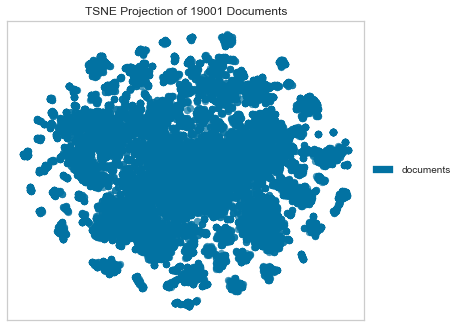

In [75]:
# Don't color points with their classes
tsne = TSNEVisualizer(labels=["documents"])
tsne.fit(X)
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

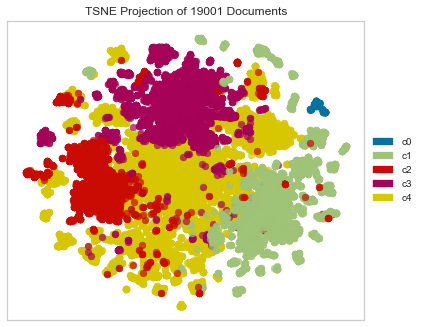

In [79]:
tsne = TSNEVisualizer()
tsne.fit(X, ["c{}".format(c) for c in model.labels_])
tsne.poof()